In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
import plotly.express as px
import random
import zipfile
import pandas as pd


In [2]:
# Extract train dataset
train_zip_ref = zipfile.ZipFile('/content/sign_mnist_train.zip', 'r')
train_zip_ref.extractall('/content')
train_zip_ref.close()


In [3]:
# Extract test dataset
test_zip_ref = zipfile.ZipFile('/content/sign_mnist_test.zip', 'r')
test_zip_ref.extractall('/content')
test_zip_ref.close()


In [4]:
# Load train data
train_data = pd.read_csv('/content/sign_mnist_train.csv')
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Load test data
test_data = pd.read_csv('/content/sign_mnist_test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
# Check the shape of train and test data
train_shape = train_data.shape
test_shape = test_data.shape

In [7]:
# Check for missing values
train_missing_values = train_data.isnull().sum()
test_missing_values = test_data.isnull().sum()

<Axes: >

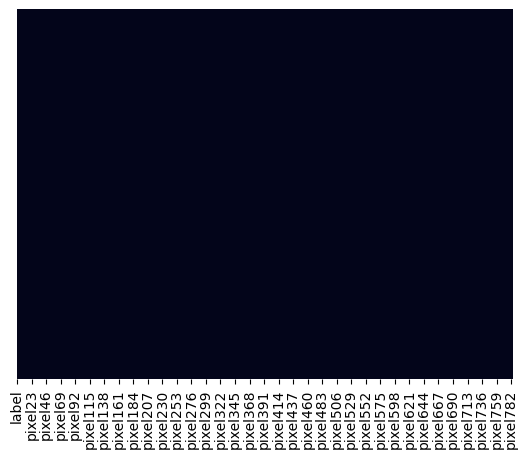

In [8]:
# Visualize missing values
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)


In [9]:
# Drop duplicates
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [10]:
# Separate labels from the data
train_labels = train_data['label']
train_images = train_data.drop(['label'], axis=1)
test_labels = test_data['label']
test_images = test_data.drop(['label'], axis=1)

In [11]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# Reshape the data
train_images = np.array(train_images).reshape(train_images.shape[0], 28, 28, 1)
test_images = np.array(test_images).reshape(test_images.shape[0], 28, 28, 1)


In [13]:
# Visualize class distribution
labels_distribution = train_labels.value_counts().sort_index(ascending=True)
fig = px.bar(
    x=labels_distribution.index,
    y=labels_distribution.values,
    title="Labels and their Images",
    labels={"x": "Label", "y": "Number of Images"},
    text=labels_distribution.values,
    color_discrete_sequence=["#ADD8E6"],
)

In [14]:
fig.update_layout(
    title_x=0.5,
    title_font_color="#fff",
    title_font_size=20,
    paper_bgcolor="#000000",
    font_color="#fff",
    plot_bgcolor="#000000",
    xaxis=dict(
        tickmode='linear',
        ticktext=labels_distribution.index
    ))
fig.update_yaxes(showgrid=False)
fig.update_traces(textfont_color='purple')
fig.show()

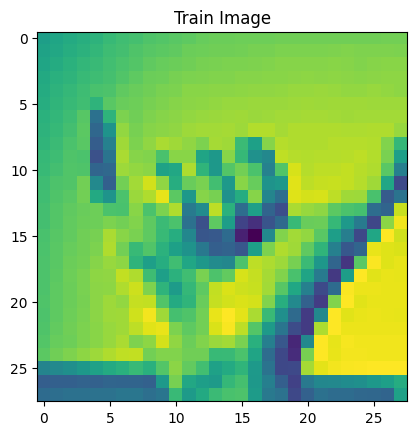

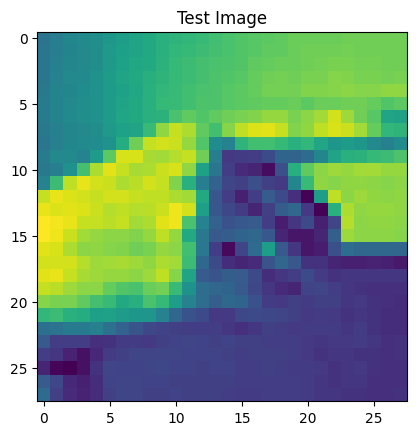

In [15]:
# Visualize random train and test images
random_index = random.randint(0, len(test_images))
plt.imshow(np.reshape(train_images[random_index], (28, 28)))
plt.title('Train Image')
plt.show()
plt.imshow(np.reshape(test_images[random_index], (28, 28)))
plt.title('Test Image')
plt.show()

In [16]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(25, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [17]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [18]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



858/858 [==============================] - 41s 47ms/step - loss: 3.2188 - accuracy: 0.0437


In [19]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)


225/225 [==============================] - 11s 51ms/step - loss: 3.2200 - accuracy: 0.0343


In [20]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



858/858 [==============================] - 169s 194ms/step - loss: 0.5493 - accuracy: 0.8298 - val_loss: 0.3206 - val_accuracy: 0.9003
Epoch 2/10
858/858 [==============================] - 166s 194ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.1596 - val_accuracy: 0.9513
Epoch 3/10
858/858 [==============================] - 164s 191ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.2004 - val_accuracy: 0.9416
Epoch 4/10
858/858 [==============================] - 169s 197ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.1342 - val_accuracy: 0.9640
Epoch 5/10
858/858 [==============================] - 167s 194ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.2192 - val_accuracy: 0.9433
Epoch 6/10
858/858 [==============================] - 166s 193ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.1294 - val_accuracy: 0.9664
Epoch 7/10
858/858 [==============================] - 165s 192ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.2592 - val_accura

In [21]:
# Final evaluation on test data
model.evaluate(test_images, test_labels)


225/225 [==============================] - 8s 38ms/step - loss: 0.2733 - accuracy: 0.9520


[0.2733393609523773, 0.952035665512085]

In [22]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


225/225 [==============================] - 9s 40ms/step


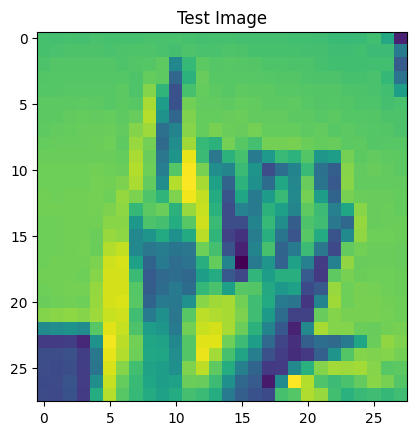

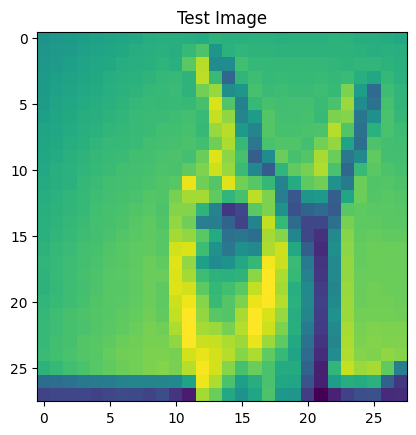

In [23]:
# Visualize random predictions
plt.imshow(np.reshape(test_images[11], (28, 28)))
plt.title('Test Image')
plt.show()
plt.imshow(np.reshape(test_images[12], (28, 28)))
plt.title('Test Image')
plt.show()

In [24]:
# Calculate accuracy and mean squared error
accuracy = accuracy_score(predicted_labels, test_labels)
mse = mean_squared_error(predicted_labels, test_labels)
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)

Accuracy: 0.9520356943669828
Mean Squared Error: 4.554099274958171
